In [6]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [7]:
import os

In [29]:
datadir = '../data/'
datafiles = [f for f in os.listdir(datadir) if '.csv' in f]

In [30]:
print datafiles, len(datafiles)

['burglary_heat.csv', 'bus_license.csv', 'crime.csv', 'dat_model.csv', 'food_inspections.csv', 'garbage_carts.csv', 'garbageCarts_heat.csv', 'inspectors.csv', 'sanitation_code.csv', 'sanitationComplaints_heat.csv', 'violation_dat.csv', 'weather_20110401_20141031.csv'] 12


In [31]:
burg_heat_df = pd.read_csv(datadir + datafiles[0])
bus_license_df = pd.read_csv(datadir + datafiles[1])
crime_df = pd.read_csv(datadir + datafiles[2])
dat_model_df = pd.read_csv(datadir + datafiles[3])
food_inspections_df = pd.read_csv(datadir + datafiles[4])
garbage_carts_df = pd.read_csv(datadir + datafiles[5])
inspectors_df = pd.read_csv(datadir + datafiles[7])
sanitation_code_df = pd.read_csv(datadir + datafiles[8])
violation_dat_df = pd.read_csv(datadir + datafiles[10])
weather_df = pd.read_csv(datadir + datafiles[11])


dfs = [burg_heat_df, 
        bus_license_df ,
        crime_df ,
        dat_model_df ,
        food_inspections_df ,
        garbage_carts_df ,
        inspectors_df ,
        sanitation_code_df ,
        violation_dat_df ,
        weather_df]

for df in dfs:
    if 'Unnamed: 0' in df:
        del df['Unnamed: 0']

In [40]:
weather_df

,precipIntensity,temperatureMax,windSpeed,humidity,date
0,0.00237,46.73,6.85,0.68,15065
1,0.00000,59.25,10.35,0.64,15066
2,0.00158,73.37,14.26,0.54,15067
3,0.00555,67.70,17.61,0.70,15068
4,0.00000,50.22,11.58,0.50,15069
5,0.00000,54.53,10.14,0.58,15070
6,0.00848,43.13,8.54,0.87,15071
7,0.01369,50.19,11.22,0.93,15072
8,0.00000,64.17,7.31,0.81,15073
9,0.00000,80.84,19.67,0.66,15074


In [34]:
from datetime import datetime, timedelta

In [35]:
dat_model_df['Inspection_Date'] = dat_model_df['Inspection_Date'].apply(lambda v : datetime.fromordinal(v) + timedelta(days=365*1970))

In [37]:
dat_model_df.sort(columns='Inspection_Date')

,Inspection_Date,License,Inspection_ID,Business_ID,criticalCount,seriousCount,minorCount,Facility_Type,pass_flag,fail_flag,...,caterers_liquor_license,mobile_food_license,heat_burglary,heat_garbage,heat_sanitation,Inspector_Assigned,precipIntensity,temperatureMax,windSpeed,humidity
1675,2011-05-12,23161,604398,NaN,0,1,4,Other,0,1,...,0,0,3.975034,2.090135e+01,27.899217,brown,0.00083,87.056667,8.030000,0.63
1057,2011-05-12,32359,565483,32359-20100516,0,0,4,Restaurant,1,0,...,0,0,37.951806,1.652514e+01,4.930823,green,0.00083,87.056667,8.030000,0.63
1058,2011-05-12,1145420,565484,1145420-20100516,0,0,2,Restaurant,1,0,...,0,0,11.884977,7.053964e+00,4.553044,green,0.00083,87.056667,8.030000,0.63
1941,2011-05-12,1843771,612436,1843771-20110316,0,0,2,Restaurant,1,0,...,0,0,14.173110,1.861730e+00,6.886439,purple,0.00083,87.056667,8.030000,0.63
1940,2011-05-12,1869250,612435,1869250-20110316,1,1,4,Restaurant,0,1,...,0,0,14.173110,1.861730e+00,6.886439,purple,0.00083,87.056667,8.030000,0.63
1153,2011-05-12,1447,567590,1447-20100416,2,1,0,Restaurant,0,1,...,0,0,4.966167,2.463661e-02,8.859717,green,0.00083,87.056667,8.030000,0.63
1676,2011-05-12,2068929,604400,2068929-20101227,0,0,4,Restaurant,1,0,...,0,0,3.286721,1.277259e+01,8.527790,brown,0.00083,87.056667,8.030000,0.63
1922,2011-05-12,51091,610253,NaN,2,1,6,Other,0,1,...,0,0,23.965931,9.529158e+00,26.971564,orange,0.00083,87.056667,8.030000,0.63
2754,2011-05-12,16765,660215,16765-20110716,0,1,2,Grocery_Store,0,1,...,0,0,23.162690,1.401712e+01,18.753474,orange,0.00083,87.056667,8.030000,0.63
710,2011-05-12,1546696,543593,1546696-20110716,0,0,5,Other,1,0,...,0,0,1.421951,2.135954e+01,15.650017,orange,0.00083,87.056667,8.030000,0.63


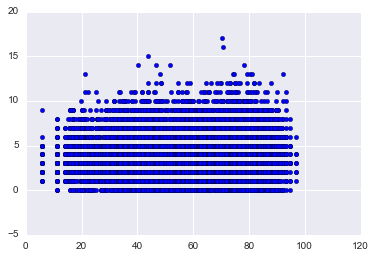

In [39]:
plt.figure()
plt.scatter(dat_model_df['temperatureMax'], dat_model_df['minorCount'])
plt.show()